<a href="https://colab.research.google.com/github/Mostafizur979/Artificial-Intelligence-Lab/blob/main/AI_Lab8_scalling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df=df.iloc[:,2:]

In [ ]:
df.sample(5)

,Age,EstimatedSalary,Purchased
68,22,63000,0
395,46,41000,1
181,31,71000,0
276,38,71000,0
161,25,90000,0


## Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Age','EstimatedSalary']], df['Purchased'],test_size=0.3)
X_train.shape


(280, 2)

In [ ]:
X_train

,Age,EstimatedSalary
251,37,52000
194,28,89000
228,40,72000
57,28,79000
363,42,79000
...,...,...
373,59,130000
399,49,36000
263,35,72000
76,18,52000


In [ ]:
X_test

,Age,EstimatedSalary
270,43,133000
173,34,43000
261,36,144000
385,56,60000
186,20,82000
...,...,...
207,52,114000
94,29,83000
387,39,71000
55,24,55000


In [ ]:
X_test.shape

(120, 2)

# StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler.mean_

array([3.82500000e+01, 6.84178571e+04])

In [ ]:
X_train

,Age,EstimatedSalary
251,37,52000
194,28,89000
228,40,72000
57,28,79000
363,42,79000
...,...,...
373,59,130000
399,49,36000
263,35,72000
76,18,52000


In [ ]:
X_train_scaled

array([[-0.116227  , -0.4911602 ],
       [-0.95306138,  0.61573988],
       [ 0.1627178 ,  0.10716417],
       [-0.95306138,  0.3165777 ],
       [ 0.34868099,  0.3165777 ],
       [ 0.81358899, -1.2988981 ],
       [ 0.72060739,  1.45339399],
       [-0.0232454 ,  0.34649391],
       [-0.67411659,  0.1669966 ],
       [-1.04604298,  0.82515341],
       [-1.13902458,  0.10716417],
       [-0.116227  ,  0.07724795],
       [ 0.1627178 ,  0.28666148],
       [ 0.81358899,  1.15423181],
       [-0.116227  ,  0.3165777 ],
       [-1.13902458, -1.149317  ],
       [-0.30219019,  0.67557232],
       [-0.76709819, -1.53822784],
       [ 0.2556994 ,  0.10716417],
       [ 1.27849698, -1.41856297],
       [-1.88287737, -0.01250071],
       [-0.30219019, -0.46124398],
       [-0.30219019, -1.2988981 ],
       [ 0.81358899, -1.35873053],
       [-1.23200618,  0.34649391],
       [ 0.44166259,  1.81238862],
       [ 0.2556994 , -0.4911602 ],
       [-1.41796937, -1.20914944],
       [-1.51095097,

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train_scaled

,Age,EstimatedSalary
0,-0.116227,-0.491160
1,-0.953061,0.615740
2,0.162718,0.107164
3,-0.953061,0.316578
4,0.348681,0.316578
...,...,...
275,1.929368,1.842305
276,0.999552,-0.969820
277,-0.302190,0.107164
278,-1.882877,-0.491160


In [ ]:
np.round(X_train.describe(), 3)

,Age,EstimatedSalary
count,280.000,280.000
mean,38.250,68417.857
std,10.774,33486.536
min,18.000,15000.000
25%,30.000,42750.000
50%,37.500,65500.000
75%,47.000,86250.000
max,60.000,150000.000


In [ ]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,-0.1
75%,0.8,0.5
max,2.0,2.4


# Effect of Scaling

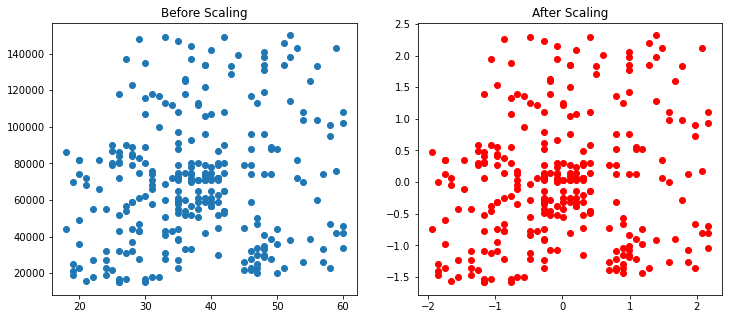

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

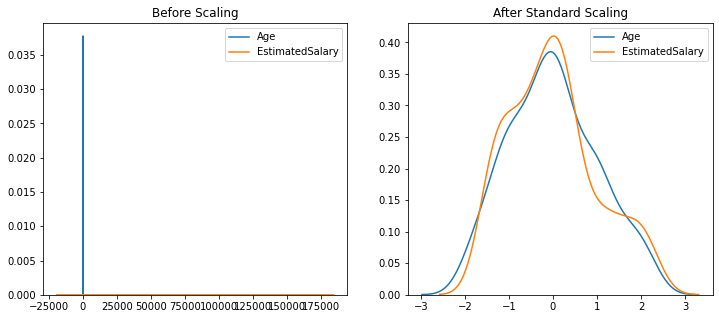

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

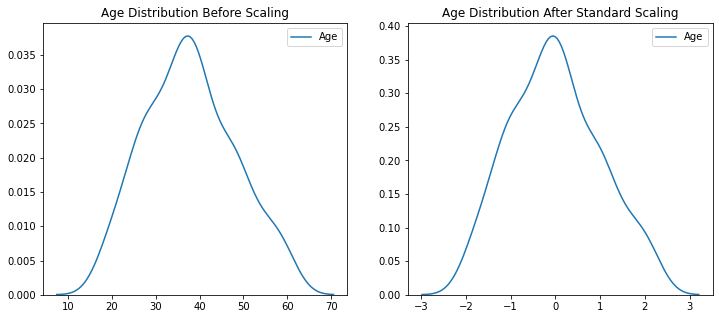

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

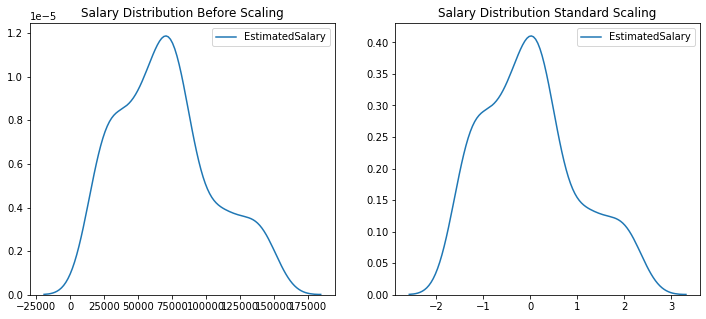

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()